<a href="https://colab.research.google.com/github/daehyun1023/AlgorithmicTrading/blob/main/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%ED%8A%B8%EB%A0%88%EC%9D%B4%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# !pip install -U finance-datareader

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# import FinanceDataReader as fdr
import cvxopt as opt
from cvxopt import solvers
import warnings
import warnings 
warnings.filterwarnings('ignore')

# for back-testing
import datetime

In [ ]:


# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도



In [ ]:
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.1
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [ ]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 17
['/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/l

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")


sys_font number: 48
nanum_font number: 31


In [ ]:
# 한번 프린트 해보자
nanum_font

['/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/f

In [ ]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
# !python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumMyeongjo Eco


In [ ]:
# 우선 fm._rebuild() 를 해주고
fm._rebuild()

In [ ]:
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
# 최대 행 수 설정
pd.set_option('display.max_rows', 500)
# 최대 열 수 설정
pd.set_option('display.max_columns', 500)
# 표시할 가로의 길이
pd.set_option('display.width', 1000)

## Load Data

In [ ]:
dh_dir = "drive/My Drive/Colab Notebooks/알고리즘트레이딩"
os.chdir(dh_dir)
# je_dir = "drive/My Drive/Colab Notebooks/알고리즘 트레이딩"
# os.chdir(je_dir)

In [ ]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/알고리즘트레이딩'

In [ ]:
etf1=pd.read_excel('ETF수정주가.xlsx',sheet_name='수정주가', index_col=0)
etf2=pd.read_excel('ETF수정주가.xlsx',sheet_name='시가총액', index_col=0)

In [ ]:
etf1.head()

,KODEX 200,KOSEF 200,KODEX 반도체,KODEX 은행,KODEX 자동차,TIGER KRX100,TIGER 은행,TIGER 반도체,TIGER 방송통신,KODEX China H,KOSEF KRX100,KODEX 일본TOPIX100,TIGER 200,KODEX 삼성그룹,KODEX 기계장비,KODEX 증권,KOSEF 블루칩,KOSEF 고배당,TIGER 라틴35,KINDEX 200,KBSTAR 5대그룹주,KINDEX 삼성그룹섹터가중,TREX 200,KBSTAR 국고채3년,KODEX 국고채3년,KINDEX 중기국고채,KOSEF 국고채3년,KODEX 인버스,TIGER 국채3년,KODEX 에너지화학,KODEX 철강,TIGER 차이나항셍25,KODEX 건설,ARIRANG 코스피50,KOSEF 통안채1년,KODEX 레버리지,TIGER 인버스,TIGER 레버리지,TIGER 원유선물Enhanced(H),KOSEF 단기자금,KINDEX 삼성그룹동일가중,KODEX 골드선물(H),TIGER 미국나스닥100,KBSTAR 중기우량회사채,TIGER 농산물선물Enhanced(H),마이다스 200커버드콜5%OTM,KOSEF 미국달러선물,TIGER 삼성그룹펀더멘털,TIGER LG그룹+펀더멘털,TIGER 현대차그룹+펀더멘털,KODEX 구리선물(H),KODEX 콩선물(H),TIGER 200 건설,TIGER 200 중공업,TIGER 200 철강소재,TIGER 200 에너지화학,TIGER 200 IT,TIGER 200 금융,TIGER 경기방어,TIGER 200 경기소비재,TIGER 금속선물(H),TIGER 금은선물(H),KOSEF 미국달러선물인버스,KBSTAR 수출주,KBSTAR 우량업종,KODEX 보험,KODEX 운송,파워 코스피100,KINDEX 밸류대형,TIGER 미국S&P500선물(H),TIGER 헬스케어,KODEX 은선물(H),KINDEX 인버스,TREX 펀더멘탈 200,TIGER 모멘텀,KBSTAR 200,KOSEF 국고채10년,TIGER 중국소비테마,ARIRANG 200,KOSEF 200 선물,KODEX 국채선물10년,KINDEX 레버리지,파워 200,KODEX 단기채권,KOSEF 코스피100,KODEX MSCI Korea,TIGER 단기통안채,TIGER 소프트웨어,TIGER 증권,마이티 코스피100,TIGER 구리실물,ARIRANG 고배당주,TIGER 200커버드콜5%OTM,KOSEF 국고채10년레버리지,KTOP 코스피50,KINDEX 중국본토CSI300,KODEX 중국본토 A50,TIGER 베타플러스,TIGER 로우볼,KBSTAR 중국본토대형주CSI100,파워 중기국고채,KODEX 국채선물10년인버스,KINDEX 미국다우존스리츠(합성 H),TIGER 미국MSCI리츠(합성 H),TIGER 단기선진하이일드(합성 H),KBSTAR 채권혼합,KBSTAR 주식혼합,KODEX 미국S&P바이오(합성),ARIRANG 글로벌MSCI(합성 H),ARIRANG 바벨 채권,ARIRANG 단기유동성,KINDEX 단기통안채,TIGER 차이나CSI300,파워 고배당저변동성,TIGER 일본TOPIX(합성 H),TIGER 유로스탁스50(합성 H),ARIRANG 선진국MSCI(합성 H),ARIRANG 신흥국MSCI(합성 H),KINDEX 일본TOPIX레버리지(H),KBSTAR 일본TOPIX레버리지(H),KBSTAR 단기통안채,KODEX 미국S&P IT(합성),KODEX 미국S&P산업재(합성),KODEX 미국S&P금융(합성),KOSEF 인도Nifty50(합성),TIGER 미국나스닥바이오,ARIRANG 차이나H 레버리지(합성 H),KODEX China H 레버리지(H),TIGER 차이나CSI300레버리지(합성),KINDEX 일본TOPIX인버스(합성 H),SMART 선진국MSCI World(합성 H),디와이파워,TIGER 코스피고배당,KINDEX 배당성장,TIGER 배당성장,KODEX 배당성장,마이티 코스피고배당,KODEX 삼성그룹밸류,ARIRANG 미국다우존스고배당주(합성 H),KODEX 단기채권PLUS,흥국 S&P코리아로우볼,TIGER 원유선물인버스(H),TIGER 차이나CSI300인버스(합성),TIGER 가격조정,KODEX 미국S&P에너지(합성),KBSTAR 미국S&P원유생산기업(합성 H),KODEX 미국S&P500선물(H),KINDEX 중국본토CSI300레버리지(합성),SMART 중국본토 중소형 CSI500(합성 H),ARIRANG 스마트베타 Value,ARIRANG 스마트베타 Momentum,ARIRANG 스마트베타 Quality,KODEX 200가치저변동,TIGER 미국S&P500선물인버스(H),TIGER 미국S&P500레버리지(합성 H),TIGER 유로스탁스레버리지(합성 H),TIGER 이머징마켓MSCI레버리지(합성 H),KINDEX 골드선물 레버리지(합성 H),KOSEF 미국달러선물 레버리지(합성),KINDEX 한류,KODEX 코스피,파워 단기채,KODEX 200 중소형,TIGER 200 헬스케어,TIGER 200 산업재,TIGER 200 생활소비재,TIGER 우량가치,ARIRANG 코스피,TIGER 화장품,TIGER 여행레저,TIGER 미디어컨텐츠,TIGER KTOP30,KODEX 코스닥 150,KODEX KTOP30,KOSEF 미국달러선물 인버스2X(합성),TIGER 코스닥150,KINDEX 골드선물 인버스2X(합성 H),TIGER 코스닥150 레버리지,KODEX 코스닥150 레버리지,KBSTAR V&S셀렉트밸류,TIGER 인도니프티50레버리지(합성),ARIRANG 스마트베타 LowVOL,KODEX 코스피100,KODEX 배당성장채권혼합,TIGER 경기방어채권혼합,ARIRANG 스마트베타Quality채권혼합,KINDEX 일본Nikkei225(H),ARIRANG 우량회사채50 1년,TIGER 일본니케이225,KBSTAR V&S셀렉트밸류채권혼합,TIGER 200IT레버리지,TIGER 200에너지화학레버리지,KODEX 바이오,KODEX 모멘텀Plus,KODEX 퀄리티Plus,KODEX 밸류Plus,TIGER 미국다우존스30,TIGER 유로스탁스배당30,TIGER 차이나HSCEI,KINDEX 베트남VN30(합성),KODEX 가치투자,KODEX 성장투자,KODEX 턴어라운드투자,TIGER 일본TOPIX헬스케어(합성),TIGER S&P글로벌헬스케어(합성),KBSTAR 차이나HSCEI(H),TIGER 코스닥150선물인버스,KODEX 코스닥150선물인버스,KODEX 선진국MSCI World,ARIRANG 고배당저변동50,ARIRANG 고배당주채권혼합,KINDEX 코스닥(합성),TIGER 200동일가중,KBSTAR 200선물레버리지,KBSTAR 200선물인버스,KBSTAR 200선물인버스2X,KODEX 200동일가중,KODEX 200선물인버스2X,TIGER 200선물인버스2X,KBSTAR 모멘텀밸류,KBSTAR 모멘텀로우볼,ARIRANG 200선물레버리지,ARIRANG 200선물인버스2X,KOSEF 200선물인버스2X,KOSEF 200선물인버스,KOSEF 200선물레버리지,KBSTAR 헬스케어,KBSTAR 헬스케어채권혼합,TIGER 대만TAIEX선물(H),KINDEX 인도네시아MSCI(합성),ARIRANG 심천차이넥스트(합성),KODEX 심천ChiNext(합성),KOSEF 배당바이백Plus,KOSEF 저PBR가중,TIGER 코스닥150IT,TIGER 코스닥150바이오테크,TIGER 미국달러선물레버리지,TIGER 미국달러선물인버스2X,TIGER 우선주,KODEX WTI원유선물(H),KODEX 미국달러선물,KODEX 미국달러선물레버리지,KODEX 미국달러선물인버스2X,KODEX 미국달러선물인버스,KINDEX 필리핀MSCI(합성),ARIRANG 단기우량채권,KINDEX 러시아MSCI(합성),TIGER 지속배당,KBSTAR 고배당,KODEX 미디어&엔터테인먼트,KODEX IT,KODEX 경기소비재,KODEX 필수소비재,KODEX 헬스케어,ARIRANG 중형주저변동50,TIGER 코스닥150로우볼,KBSTAR 미국장기국채선물(H),KBSTAR 미국장기국채선물인버스(H),KBSTAR 미국장기국채선물레버리지(합성 H),KBSTAR 미국장기국채선물인버스2X(합성 H),TIGER 20

In [ ]:
etf2.tail()

## ETF 선정

In [ ]:
etf2['KODEX 모멘텀Plus']['2019-04-26']

21692000000.0

In [ ]:
# 시가총액 상위 30개 항목 보기
market_cap = etf2.loc['2019-04-26']
market_cap.sort_values().head(30)

파워 단기채                     1.267560e+09
KODEX 운송                   2.240000e+09
ARIRANG 심천차이넥스트(합성)        2.683800e+09
TIGER 금속선물(H)              3.105000e+09
ARIRANG KRX300IT           3.151400e+09
ARIRANG 차이나H 레버리지(합성 H)    3.417750e+09
ARIRANG 바벨 채권              3.464700e+09
ARIRANG KRX300헬스케어         3.489600e+09
ARIRANG 200선물인버스2X         3.555000e+09
TIGER 200 산업재              3.989700e+09
KODEX China H선물인버스(H)      4.176000e+09
KBSTAR 200중공업              4.208600e+09
ARIRANG KRX300자유소비재        4.265300e+09
TIGER 금은선물(H)              4.338000e+09
KBSTAR 코스닥150선물인버스         4.389000e+09
KBSTAR KQ모멘텀로우볼            4.400000e+09
KOSEF 코스닥150선물             4.410250e+09
ARIRANG 코스닥150선물인버스        4.430000e+09
KODEX MSCI모멘텀              4.550000e+09
KBSTAR 200철강소재             4.558800e+09
KBSTAR KQ모멘텀밸류             4.585000e+09
KODEX WTI원유선물인버스(H)        4.663125e+09
KINDEX 국채선물10년인버스          4.693750e+09
KBSTAR 중소형모멘텀로우볼           4.712500e+09
ARIRANG 코스닥150             4.744000e+09


In [ ]:
# 평균 수익률 상위 30개 항목 보기
holding_periods=1
n_term=252 # dailiy return을 annualize
data = etf1

returns = data.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
exp_rets = returns.mean() * n_term # average return -- > APR(annual percentage rate)
exp_rets.sort_values().tail(30)

TIGER 헬스케어                  0.166233
TIGER 미국다우존스30              0.172916
TIGER MSCI Korea TR         0.172919
TIGER 코스닥150 레버리지           0.173932
TIGER 미국S&P500레버리지(합성 H)    0.176471
KBSTAR 글로벌4차산업IT(합성 H)      0.176688
TIGER 미국나스닥100              0.180244
ARIRANG KRX300IT            0.184643
KODEX 미국S&P IT(합성)          0.196138
디와이파워                       0.198603
KODEX 미국S&P바이오(합성)          0.208704
TIGER 코스닥150바이오테크           0.209584
TIGER 인도니프티50레버리지(합성)       0.216211
KINDEX 미국4차산업인터넷(합성 H)      0.230633
ARIRANG 미국나스닥기술주            0.232821
TIGER 지주회사                  0.240929
KBSTAR 대형고배당10TR            0.244815
TIGER 차이나CSI300레버리지(합성)     0.248751
KODEX 헬스케어                  0.249462
KOSEF 코스닥150선물인버스           0.250786
TIGER 의료기기                  0.259514
KODEX Top5PlusTR            0.259875
KINDEX 미국WideMoat가치주        0.287152
KBSTAR 중국MSCI China선물(H)    0.323674
KINDEX 싱가포르리츠               0.338180
KBSTAR KRX300미국달러선물혼합       0.339304
TIGER 200IT레버리지             0.370243
K

In [ ]:
k = returns[{'KODEX 모멘텀Plus', 'TIGER 미국S&P500레버리지(합성 H)'}].dropna(axis = 0)

findfont: Font family ['NanumMyeongjo Eco'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumMyeongjo Eco'] not found. Falling back to DejaVu Sans.


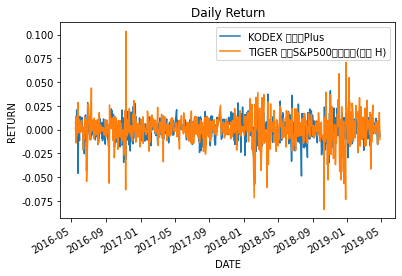

In [ ]:
k.plot()
plt.title("Daily Return")
plt.xlabel("DATE")
plt.ylabel("RETURN")
plt.show()

In [ ]:
# 상관계수 하위 30개 항목 보기
a=etf1.corr()['KODEX 모멘텀Plus'].sort_values()
a.head(50)

KOSEF 코스닥150선물인버스           -0.911856
TIGER 코스닥150선물인버스           -0.851982
ARIRANG 코스닥150선물인버스         -0.851851
KODEX 코스닥150선물인버스           -0.848046
ARIRANG 국채선물10년             -0.830747
KBSTAR KRX300선물인버스          -0.830393
KODEX KRX300선물인버스           -0.829871
TIGER KRX300선물인버스           -0.814229
KBSTAR 국채선물10년              -0.795367
HANARO 200선물인버스             -0.752120
ARIRANG 국채선물3년              -0.751211
KOSEF 200선물인버스2X            -0.732313
KODEX 200선물인버스2X            -0.732041
KBSTAR 200선물인버스2X           -0.731455
ARIRANG 200선물인버스2X          -0.731240
TIGER 200선물인버스2X            -0.728563
KBSTAR 200선물인버스             -0.719028
KBSTAR 코스닥150선물인버스          -0.715613
KOSEF 200선물인버스              -0.712947
KODEX 미국달러선물레버리지            -0.712295
TIGER 미국달러선물레버리지            -0.702451
KOSEF 미국달러선물 레버리지(합성)       -0.644863
TIGER 중장기국채                 -0.630998
TIGER 원유선물인버스(H)            -0.621692
KODEX 미국달러선물                -0.562308
KODEX 인버스                   -0.560858
KINDEX 인버스  

In [ ]:
## 무위험 자산은 'KOSEF 단기자금', 이자율은 0.0075

# cols=['DATE','KODEX 200','TIGER 미국S&P500선물인버스(H)']
# cols=['DATE','KODEX 200','KODEX 미국FANG플러스(H)']
# cols=['KODEX 200','KODEX 인버스']
# cols=['ARIRANG 스마트베타 Momentum', 'ARIRANG 스마트베타 Quality']

cols = ['KODEX 미국달러선물레버리지','KODEX 모멘텀Plus','KOSEF 단기자금']

In [ ]:
data1=etf1[cols]
data1.dropna(axis=0,inplace=True)

data2=etf2[cols]
data2.dropna(axis=0,inplace=True)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
data1.head()

,KODEX 미국달러선물레버리지,KODEX 모멘텀Plus,KOSEF 단기자금
DATE,,,
2016-12-27,10070.0,8742.0,97725.0
2016-12-28,10125.0,8850.0,97749.0
2016-12-29,10110.0,8904.0,97759.0
2017-01-02,10120.0,8953.0,97778.0
2017-01-03,10040.0,8993.0,97788.0


Text(0.5, 1.0, 'KODEX 모멘텀Plus')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


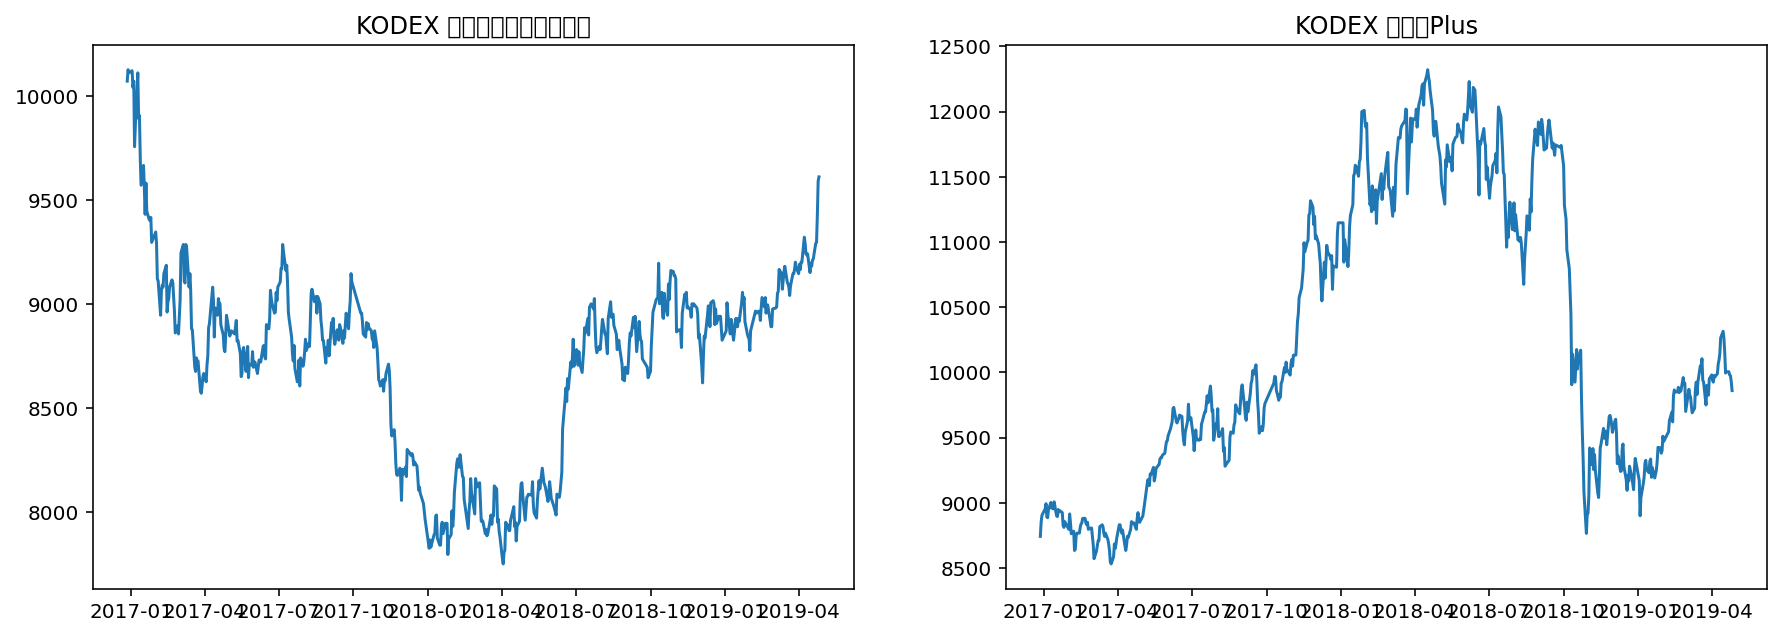

In [ ]:
# 한글 깨짐
plt.figure(figsize=(15, 5)) 

plt.subplot(1,2,1)

plt.plot(data1[cols[0]])
plt.title(cols[0])

plt.subplot(1,2,2)
plt.plot(data1[cols[1]])
plt.title(cols[1])

## 투자 기회 집합

In [ ]:
##################
hp=[1,20,252]
holding_periods=hp[0]

# dailiy return을 annualize
nt=[252,12,1]
n_term=nt[0]

returns = data1.pct_change(holding_periods).iloc[holding_periods:] # holding period return vector
exp_rets = returns.mean() * n_term # average return -- > APR(annual percentage rate)
cov_mat = returns.cov() * n_term # covariance
corr_mat = returns.corr() # corr

In [ ]:
returns

,KODEX 미국달러선물레버리지,KODEX 모멘텀Plus
DATE,,
2016-12-28,0.005462,0.012354
2016-12-29,-0.001481,0.006102
2017-01-02,0.000989,0.005503
2017-01-03,-0.007905,0.004468
2017-01-04,0.002988,-0.011453
...,...,...
2019-04-22,0.008139,0.000000
2019-04-23,0.000538,-0.002499
2019-04-24,0.013986,-0.000501


In [ ]:
# 최소분산 포트폴리오

def mean_var_portfolio(cov_mat, exp_rets, target_ret):
    
        n = len(cov_mat)
        
        # Objective function
        # min (1/2)*w.T*P*w
        P = opt.matrix(cov_mat.values) 
        q = opt.matrix(0.0, (n, 1))
        
        
        # Constraints Gw <= h
        # exp_rets*w >= target_ret and w >= 0
        G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
        h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))
        
        # Constraints Aw = b
        # sum(w) = 1
        A = opt.matrix(1.0, (1, n))
        b = opt.matrix(1.0)
        
        # Solve
        solvers.options['show_progress'] = False
        sol = solvers.qp(P, q, G, h, A, b)
        
        # Put weights into a labeled series
        w = pd.Series(sol['x'], index=cov_mat.index)
        
        return w

In [ ]:
max_risk=0.5
max_ret = exp_rets.max()
# min_ret = exp_rets[exp_rets > 0].min()
min_ret = exp_rets.min()

n_step = 100
step_diff = (max_ret - min_ret)/n_step

risks = []
rets = []
weights=[]

for step in range(n_step):
    target_ret = min_ret + (step * step_diff) # y축을 아래부터 시작해서 위로 조금씩 올려가면서
    _w = mean_var_portfolio(cov_mat, exp_rets, target_ret) # 최적화를 돌려서 나온 _w임.
    risk = np.sqrt(np.dot(np.dot(_w, cov_mat), _w))
    
    if risk > max_risk:
        break
    
    risks.append(risk)
    ret = np.dot(exp_rets, _w)
    rets.append(ret)
    weights.append(_w)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


Risk of minimum variance portfolio :  0.08957623520535518
Return of minimum variance portfolio :  0.0209923950335644
Weight of minimum variance portfolio : 
KODEX 미국달러선물레버리지    0.607618
KODEX 모멘텀Plus       0.392382
dtype: float64


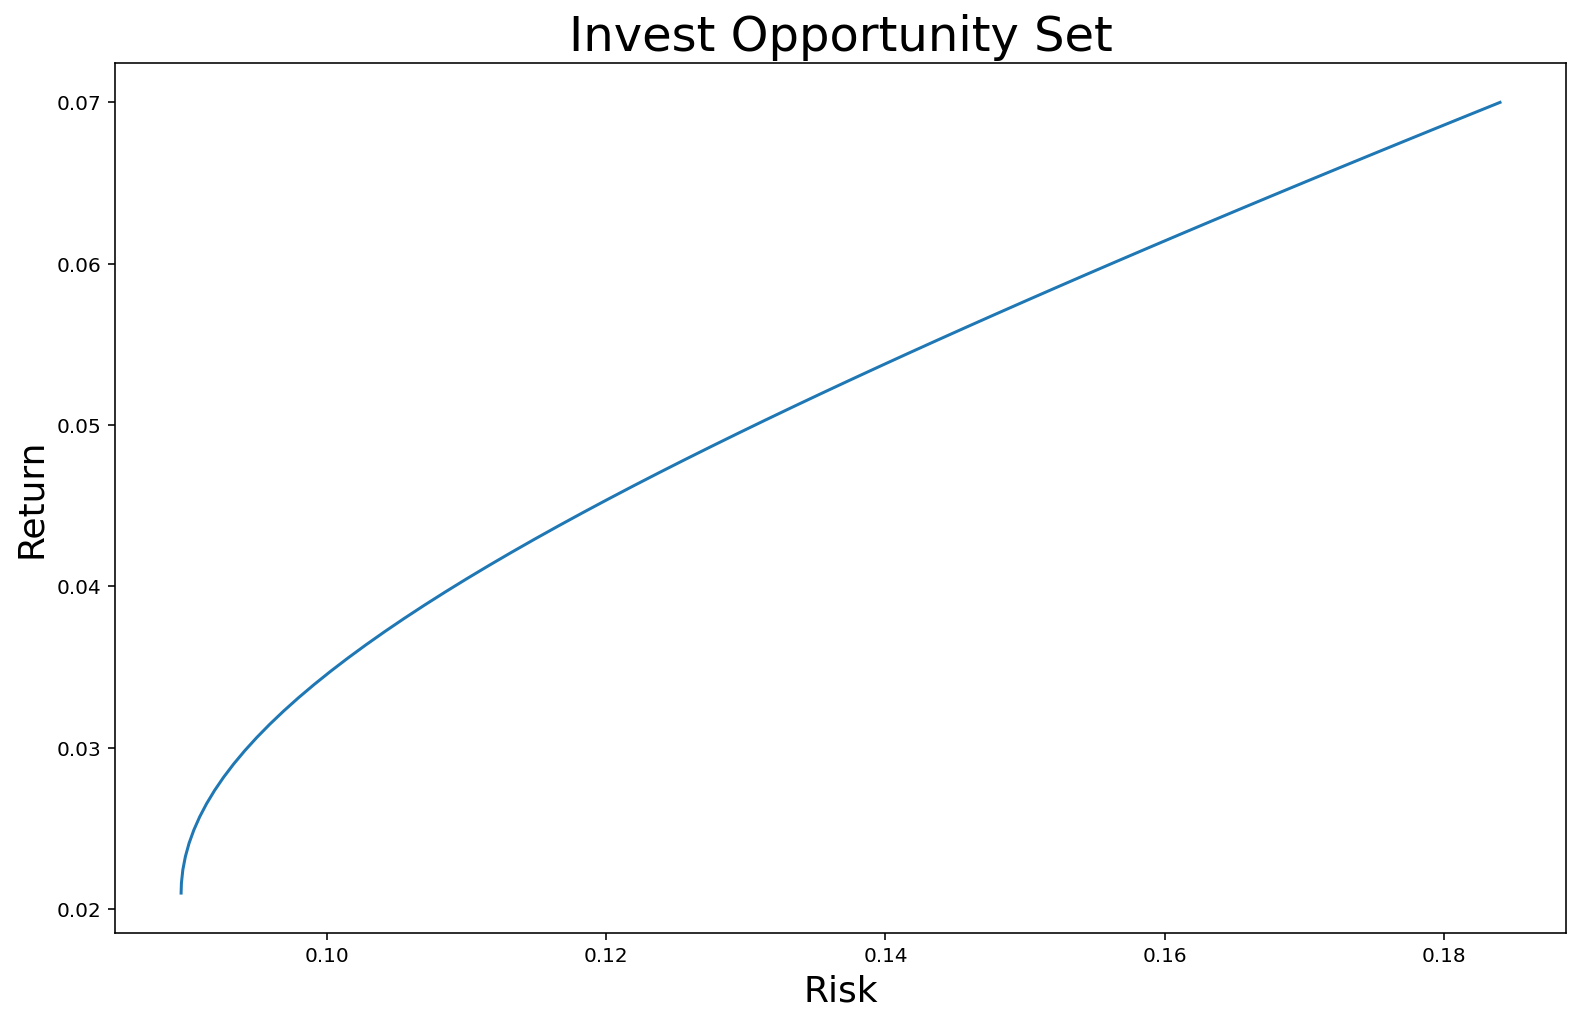

In [ ]:
plt.figure(figsize=(13,8))

plt.plot(risks, rets)
#var = np.diag(cov_mat)
#plt.scatter(np.sqrt(var), exp_rets)
plt.title("Invest Opportunity Set", fontsize=24)
plt.xlabel("Risk", fontsize=18)
plt.ylabel("Return", fontsize=18)

min_risk_idx = np.argmin(risks)
min_risk = risks[min_risk_idx]
min_risk_ret = rets[min_risk_idx]
min_risk_weight = weights[min_risk_idx]
print("Risk of minimum variance portfolio : ", min_risk)
print("Return of minimum variance portfolio : ", min_risk_ret)
print("Weight of minimum variance portfolio : ")
print(min_risk_weight)

## 완성 포트폴리오

In [ ]:
# 무위험자산 ( KOSEF 단기자금 이자율은 0.75%)
rf_rate = 0.0075

slopes = []

# ToDo
for i in range(len(risks)):
  slope_ = (rets[i] - rf_rate) / risks[i]
  slopes.append(slope_)

max_tangency_idx = np.argmax(slopes)
max_tangency = slopes[max_tangency_idx]
max_tangency_risk = risks[max_tangency_idx]
max_tangency_return = rets[max_tangency_idx]
max_tangency_weight = weights[max_tangency_idx]

print("Risk of tangency portfolio : ", max_tangency_risk)
print("Return of tangency portfolio : ", max_tangency_return)
print("Sharpe ratio of tangency portfolio : ", (max_tangency_return - rf_rate) / max_tangency_risk)
print("Weight of tangency portfolio : ")
print(max_tangency_weight)

Risk of tangency portfolio :  0.1839954488664498
Return of tangency portfolio :  0.06998938032456856
Sharpe ratio of tangency portfolio :  0.33962459783407734
Weight of tangency portfolio : 
KODEX 미국달러선물레버리지    0.01
KODEX 모멘텀Plus       0.99
dtype: float64


Text(0, 0.5, 'Return')

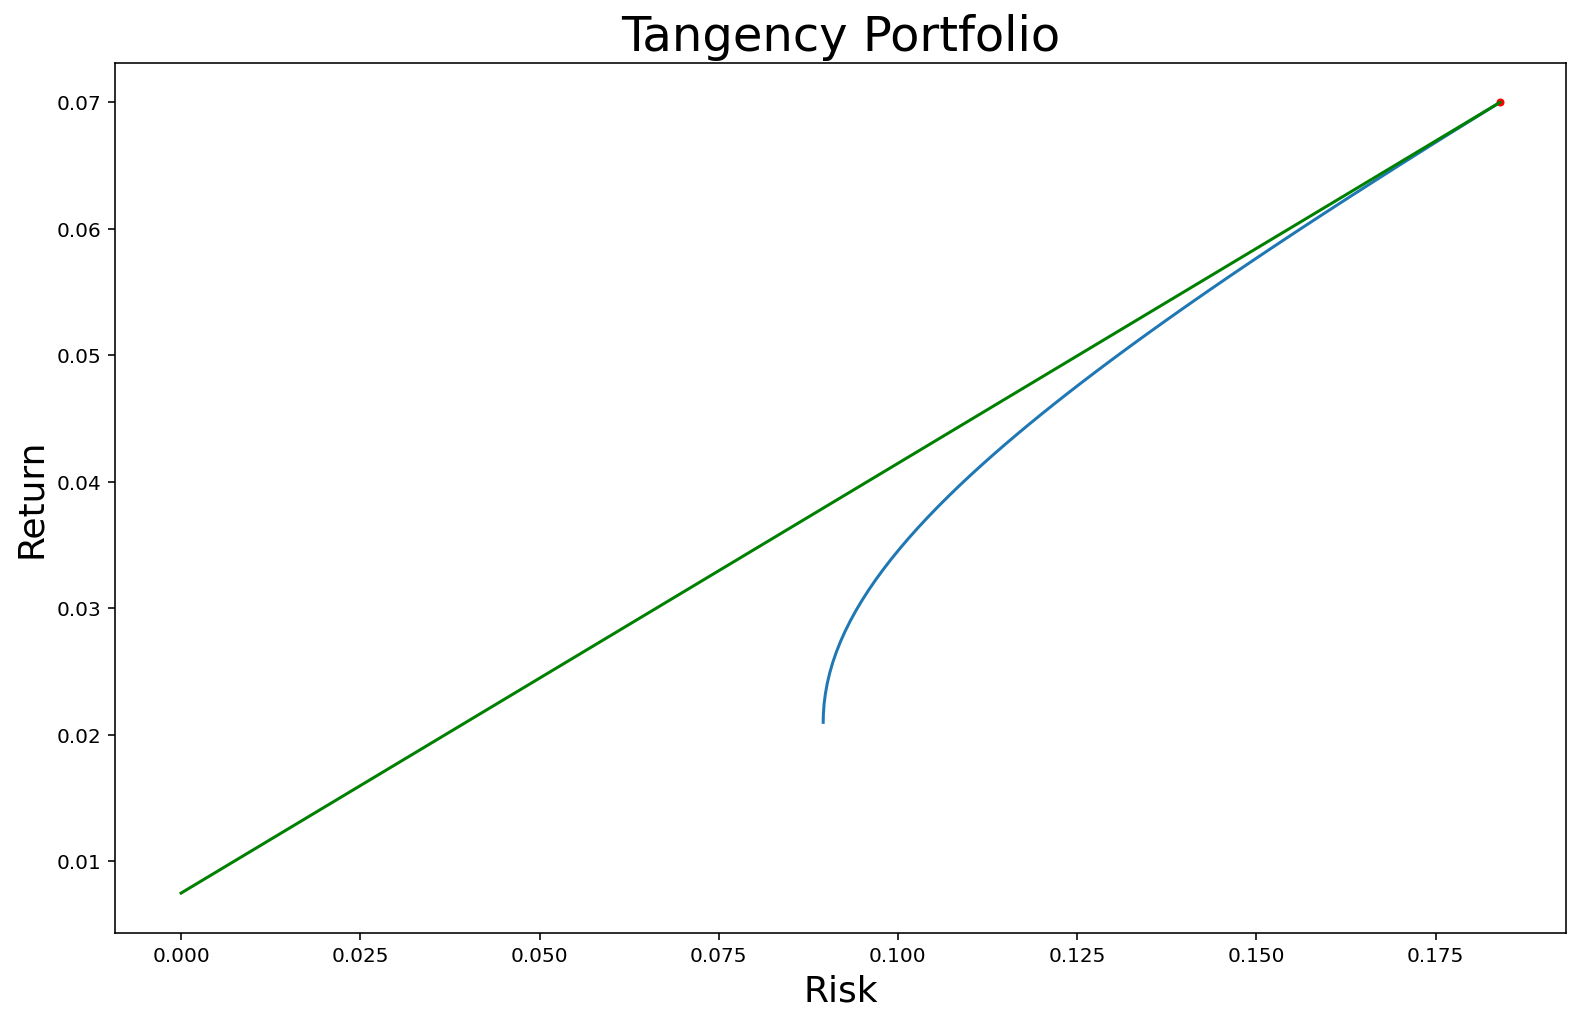

In [ ]:
CAL_x = [0, max_tangency_risk]
CAL_y = [rf_rate, max_tangency_return]

plt.figure(figsize=(13,8))
plt.plot(risks, rets)
plt.plot(max_tangency_risk, max_tangency_return, marker = '.', color = 'r')
plt.plot(CAL_x, CAL_y, color = 'g')

plt.title("Tangency Portfolio", fontsize=24)
plt.xlabel("Risk", fontsize=18)
plt.ylabel("Return", fontsize=18)

## 백테스팅

참고 : 백테스팅 기간은 2017-04-26부터 2019-04-26 (최근 2개년 데이터), \
무위험자산은 KOSEF 단기자금으로 한다. \

고려해야 할 점 (추후 수정) : \
A) 리밸런싱은 1달(20일)마다 진행한다.\
B) 리밸런싱 시점에서 tangency portfolio를 구성할 때, 이전 4달(80일)의 데이터를 바탕으로 만든다.\
C) return과 covariance를 구할 때는 월평균으로 구하여 연평균 수익률로 변화시켜준다.\
D) 시작 자산은 10000원에서 시작하여, 각 날짜마다 portfolio value가 어떻게 되는 지를 구한다.

In [ ]:
data = data1.loc['2017-04-26':]

In [ ]:
data

,KODEX 미국달러선물레버리지,KODEX 모멘텀Plus,KOSEF 단기자금
DATE,,,
2017-04-26,8770.0,8924.0,98225.0
2017-04-27,8850.0,8874.0,98245.0
2017-04-28,8945.0,8850.0,98254.0
2017-05-02,8845.0,8899.0,98269.0
2017-05-04,8870.0,8988.0,98284.0
2017-05-08,8855.0,9176.0,98288.0
2017-05-10,8920.0,9132.0,98293.0
2017-05-11,8820.0,9221.0,98303.0
2017-05-12,8825.0,9216.0,98298.0


In [ ]:
def create_data(data):
    
    result = data.pct_change(20).iloc[20:]   # 월수익률
    
    returns = result
    cov_mat = returns.cov()*12     # 연평균으로 환산
    avg_rets = returns.mean()*12   # 연평균으로 환산

    return returns, cov_mat, avg_rets

In [ ]:
returns, cov_mat, avg_rets = create_data(data)

In [ ]:
cov_mat

,KODEX 미국달러선물레버리지,KODEX 모멘텀Plus,KOSEF 단기자금
KODEX 미국달러선물레버리지,0.010847,-0.009260,0.000009
KODEX 모멘텀Plus,-0.009260,0.039097,-0.000011
KOSEF 단기자금,0.000009,-0.000011,0.000001


In [ ]:
def tangency_portfolio(cov_mat, exp_rets, target_ret, min_rets, max_rets, rf_rate = rf_rate):     # target_ret은 인자로 안 만들어도 됨. 지워도 상관 없음.
    
    n = len(cov_mat)
    P = opt.matrix(cov_mat.values)
    q = opt.matrix(0.0, (n, 1))
    
    tangency_queue = []
    weights_queue = []
    return_queue = []
    cov_queue = []
    
    steps=500
    step = (max_rets - min_rets)/steps
    minus_cnt = 0
    
    for i in range(steps):
                
        try:
        
            target_ret = min_rets + (i * step)

            # Constraints Gx <= h

            G = opt.matrix(np.vstack((-exp_rets.values, -np.identity(n))))
            h = opt.matrix(np.vstack((-target_ret, np.zeros((n, 1)))))

            # Constraints Ax = b
            # sum(x) = 1
            A = opt.matrix(1.0, (1, n))
            b = opt.matrix(1.0)

            solvers.options['show_progress'] = False
            sol = solvers.qp(P, q, G, h, A, b)

            if sol['status'] != 'optimal':
                warnings.warn("Convergence problem")
                pass

            # Put weights into a labeled series
            weights = pd.Series(sol['x'], index=cov_mat.index)
            
            tangency_ = (np.dot(exp_rets, weights) - rf_rate) / np.sqrt(np.dot(np.dot(weights, cov_mat), weights))
            tangency_queue.append(tangency_)
            weights_queue.append(weights)
            return_queue.append(np.dot(exp_rets, weights))
            cov_queue.append(np.sqrt(np.dot(np.dot(weights, cov_mat), weights)))
        
        except:
            pass

    
    tan_index = tangency_queue.index(max(tangency_queue))
    
    weights = weights_queue[tan_index]

    return weights

In [ ]:
def back_test(data, window_size):

    # Window_size는 tangency portfolio를 구할 때 이전 몇 달의 데이터를 사용할 것인지 나타낸다.

    total_days = data.shape[0]    # data.shape: (918, 2)    data.shape[0]: 918
    
    # Rebalancing을 한 달마다 진행하는 경우, 'M'으로 rebalance_period는 20이 된다.
    rebalance_period = 20

    returns, cov_mat, avg_rets= create_data(data)
    
    # n_rebalance : 총 몇 번의 리밸런싱을 하게 되는지?
    n_rebalance = int(returns.shape[0]/20) - window_size     
    # int() 하면 내림화됨. window size만큼 빼줘야 예를 들어 총 2000일이 있고 매 달(20일) 리벨런싱을 하면 
    # 100번(100개월)의 리벨런싱을 해야할 것 같지만 그렇지 않다.
    #  리벨런싱 할 때 과거 4개월의 데이터를 본다 하면, 처음 4개월은 과거 데이터 부족으로 리벨런싱을 못 함.
    #  그래서 96번 리벨런싱함. 
    w = []
    rebalancing_date=[]
    original_weights = []   # 이건 지금 코드에서는 큰 의미 없음. 
    
    for i in range(n_rebalance, -1, -1):   # n_rebalance에서 시작해서 1씩 빼준다. -1보다 클때까지(즉 0까지)
        
        # N일에 리밸런싱을 할 때에는 Tangency portfolio weight를 새로 구해야 한다. 
        # 이 때 N - window_size * rebalance_period부터 N - 1일 까지의 데이터를 사용한다.
        # (즉 4개월치 데이터를 사용한다)
        _returns, _cov_mat, _avg_rets= create_data(data.iloc[total_days - (window_size + i) * rebalance_period : total_days - i * rebalance_period])
        rebalancing_date.append(data.index[total_days - i * rebalance_period - 1])

        _target_ret = _avg_rets.quantile(0.7)    # 5개 자산의 연평균 수익률 순위 중 하위 70% 값을 타겟으로.
        _min_ret = _avg_rets.min()
        _max_ret = _avg_rets.max()

        _w = np.asarray(tangency_portfolio(_cov_mat, _avg_rets, _target_ret, _min_ret, _max_ret).values)
        _w = _w.reshape(_w.shape[0],1)
        original_weights.append(_w)
        w.append(_w)

    price = data.T
    price = np.array(price)
    
    port = [] # 여기에 날마다 변하는 Portfolio value를 저장한다.
    port_date = [] # 여기에 portfolio의 date를 저장한다.
    portfolio_value = 1000000
    port_weight = [] # 그 날의 portfolio의 구성이다. Ex) 만약 Asset1에 6000원, Asset2에 4000원, 나머지에 0원이 있다면 [6000, 4000, 0, 0, 0]이 된다.
    
    for i in range(n_rebalance, 0, -1):
        
        for j in range(rebalance_period):

            if j==0:

                # 리밸런싱을 하는 날이다. Portfolio value를 새로운 tangency portfolio weight로 맞춰준다.
                port_weight = portfolio_value * w[n_rebalance - i].T[0]
                # port_weight의 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_weight.sum()
                # portfolio_value=portfolio_value*0.6+1000000*0.4*1.0075

                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
                
            else:

                # 여기는 리밸런싱이 아닌, 그냥 날짜가 지나는 부분이다. 
                # 각 날마다 자산의 가격이 바뀌므로, 리밸런싱을 하지 않아도 가격을 따라 port_weight가 변화한다.
                port_weight = port_weight * (price[:, total_days - i * rebalance_period + j] / price[:, total_days - i * rebalance_period + j - 1])
                
                # port_weight의 값을 다 더한 게 그 날의 portfolio_value가 된다.
                portfolio_value = port_weight.sum()
                # portfolio_value=portfolio_value*0.6+1000000*0.4*1.0075
                # port에 portfolio_value를 저장하여 준다.
                port.append(portfolio_value)
                
            port_date.append(data.index[total_days - i * rebalance_period + j])
            portfolio_value= 0.6*portfolio_value + 1000000*0.4*(1+rf_rate[port_date[-1]])

            print(port_date[-1], portfolio_value)
    
    portfolio = pd.DataFrame(port, columns = ['portfolio_value'], index = port_date)
    
    return w, portfolio, original_weights, rebalancing_date

In [ ]:
rf_asset = etf1['KOSEF 단기자금'].loc['2017-04-26':]
rf_rate = rf_asset.pct_change(1).iloc[1:]
avg_rf_rate = rf_rate.mean()*252

In [ ]:
rf_rate

In [ ]:
data = data.dropna()
w, portfolio, original_weights, rebalancing_date = back_test(data, 6)

2017-12-05 00:00:00 1000020.2163145659
2017-12-06 00:00:00 1000055.6795087701
2017-12-07 00:00:00 1000087.4724494887
2017-12-08 00:00:00 1000128.7810038086
2017-12-11 00:00:00 1000253.3042163192
2017-12-12 00:00:00 1000318.0967401234
2017-12-13 00:00:00 1000317.9181326085
2017-12-14 00:00:00 1000465.7513296832
2017-12-15 00:00:00 1000406.3350382566
2017-12-18 00:00:00 1000384.1855120943
2017-12-19 00:00:00 1000358.3959970135
2017-12-20 00:00:00 1000404.6031774322
2017-12-21 00:00:00 1000406.8785381778
2017-12-22 00:00:00 1000426.6705548312
2017-12-26 00:00:00 1000458.126644959
2017-12-27 00:00:00 1000799.1358663125
2017-12-28 00:00:00 1000778.2797054374
2018-01-02 00:00:00 1001009.8128143481
2018-01-03 00:00:00 1000853.7349194122
2018-01-04 00:00:00 1000921.7334079402
2018-01-05 00:00:00 1000613.5873927902
2018-01-08 00:00:00 1000507.9878878593
2018-01-09 00:00:00 1000633.3500570834
2018-01-10 00:00:00 1000646.2633997455
2018-01-11 00:00:00 1000920.7345368224
2018-01-12 00:00:00 100089

In [ ]:
print(w[-1],rebalancing_date[-1])

[[0.00402183]
 [0.0036327 ]
 [0.99234547]] 2019-04-26 00:00:00


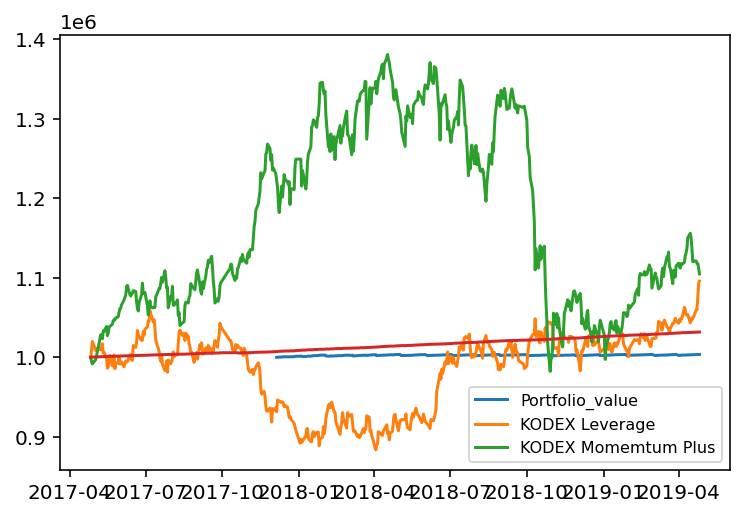

In [ ]:
plt.plot(portfolio)
for name in cols:
  plt.plot(data[name] * 1000000 / data[name][0])

plt.legend(['Portfolio_value','KODEX Leverage','KODEX Momemtum Plus'],loc='lower right',fontsize=8)

plt.show()

In [ ]:
cols

['KODEX 미국달러선물레버리지', 'KODEX 모멘텀Plus']

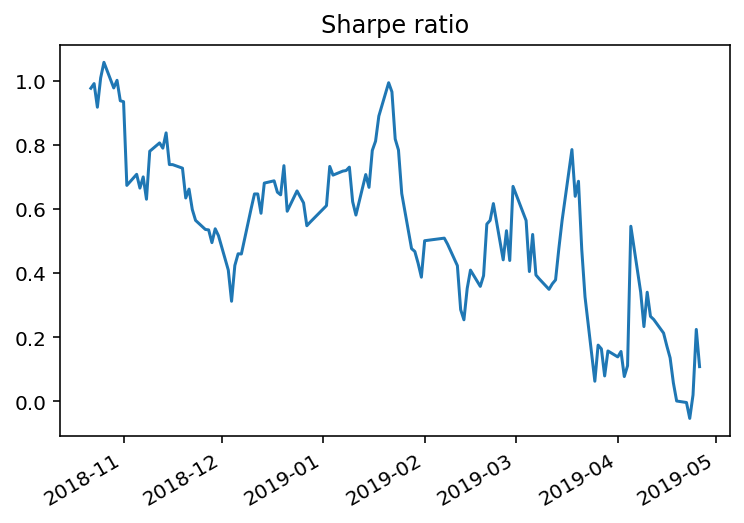

In [ ]:
# Sharpe Ratio 계산

new_port = portfolio
new_port['returns'] = new_port['portfolio_value'].pct_change(1)

# Input y에 대해 Sharpe ratio를 구해주는 함수. Sharpe ratio = mean / std 를 연환산해주면 된다.
def my_rolling_sharpe(y):
    return np.sqrt(252) * (y.mean()/y.std())
# Calculate rolling Sharpe ratio
new_port['rs'] = new_port['returns'].rolling(252).apply(my_rolling_sharpe)

new_port['rs'].plot()
plt.title('Sharpe ratio')
plt.show()

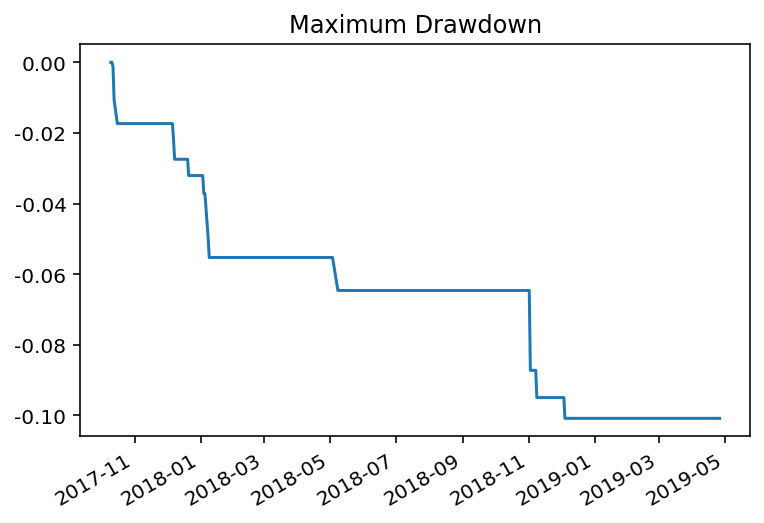

In [ ]:
# Maximum Drawdown 계산
# Drawdown이란? 저점과 고점 사이 비율.
# Maximum Drawdown이란? 새 고점에 도달하기 전까지 Drawdown

# 252일을 window로 삼아 MDD를 구해준다.
window = 252

# 이전 252일 중 고점의 값을 Roll_Max에 저장한다.
# Pandas Series.rolling 사용
Roll_Max = portfolio['portfolio_value'].rolling(window, min_periods = 1).max()

# 현재 값과 고점의 비율을 구하여 Daily_Drawdown에 저장한다.
Daily_Drawdown = portfolio['portfolio_value']/Roll_Max - 1.0

# 이전 252일 중 Daily_Drawdown의 최소값을 Max_Daily_Drawdown에 저장한다.
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods = 1).min()

# Plot the results
Max_Daily_Drawdown.plot()
plt.title('Maximum Drawdown')
plt.show()